# Data Cleaning and Transformation

In [16]:
import pandas as pd
from functions import run
data = run()
data['world_cases'].head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [17]:
data['usa_cases'].head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


## Selecting the Correct Columns

In [18]:
def select_columns(df):
    """
    Filters the DataFrame to include only relevant columns for analysis.

    Parameters
    ----------
    df : DataFrame
        Input DataFrame to filter.

    Returns
    -------
    DataFrame
    """
    cols = df.columns

    # we don't need to know the group since the world and usa have
    # different column names for their areas
    areas = ["Country/Region", "Province_State"]
    is_area = cols.isin(areas)

    # date columns are the only ones with two slashes
    has_two_slashes = cols.str.count("/") == 2
    filt = is_area | has_two_slashes
    return df.loc[:, filt]


In [19]:
select_columns(data['world_cases']).head(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496


In [20]:
select_columns(data['usa_cases']).head(3)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,0,0,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,0,0,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,0,0,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485


### Updating the `run` Function

In [21]:
#Updating run()function to include the steps above.
def run2():
    """
    Executes a sequence of data loading, transformation, and column selection steps.

    Returns
    -------
    dict
        Dictionary of processed DataFrames.
    """
    data = {}
    for group in GROUPS:
        for kind in KINDS:
            df = read_local_data(group, kind, "data/raw")
            df = select_columns(df)
            data[f"{group}_{kind}"] = df
    return data


In [22]:
data = run2()
data['usa_cases'].head(5)

NameError: name 'GROUPS' is not defined

## Updating Area Names 

In the "World" data frame, there are three cruise ships. For simplicity, all cruise ships will be titled  "Cruise Ship". The United States has an individual summary table, so we will remove it from the "World" data frame.

In [32]:
# Use the DataFram "replace" method to replace the names in the first column with strings in the dictionary.
# we will also remove all rows with "US" data from the world Data Frame.

REPLACE_AREA = {
    "Korea, South": "South Korea",
    "Taiwan*": "Taiwan",
    "Burma": "Myanmar",
    "Holy See": "Vatican City",
    "Diamond Princess": "Cruise Ship",
    "Grand Princess": "Cruise Ship",
    "MS Zaandam": "Cruise Ship",
}


def update_areas(df):
    """
    Updates area names in the DataFrame using a predefined mapping.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    DataFrame
    """
    area_col = df.columns[0]
    df[area_col] = df[area_col].replace(REPLACE_AREA)
    return df


### Updating run() 

In [33]:
#Updating run()function to include the steps above.
def run3():
    """
    Executes data loading, transformation, column selection, and area update steps.

    Returns
    -------
    dict
        Dictionary of fully processed DataFrames.
    """
    data = {}
    for group in GROUPS:
        for kind in KINDS:
            df = read_local_data(group, kind, "data/raw")
            df = select_columns(df)
            df = update_areas(df)
            data[f"{group}_{kind}"] = df
    return data


In [34]:
from functions import run3
data = run3()
data['usa_cases'].query("Province_State == 'Cruise Ship'")

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
338,Cruise Ship,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
572,Cruise Ship,0,0,0,0,0,0,0,0,0,...,103,103,103,103,103,103,103,103,103,103


## Aggregate Repeating Areas
The values in the "area" column have replicated values. The values in the "area" column are used to track deaths/cases by the province/state/county. Group by "area" column and sum up the date columns.

In [35]:
def group_area(df):
    """
    Aggregates data by area, summing up all values.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    DataFrame
    """
    grouping_col = df.columns[0]
    return df.groupby(grouping_col).sum()


### Updating run() 

In [36]:
#Updating run()function to include the steps above.
def run4():
    """
    Carries out a complete data processing pipeline including grouping by area.

    Returns
    -------
    dict
        Dictionary of aggregated DataFrames.
    """
    data = {}
    for group in GROUPS:
        for kind in KINDS:
            df = read_local_data(group, kind, "data/raw")
            df = select_columns(df)
            df = update_areas(df)
            df = group_area(df)
            data[f"{group}_{kind}"] = df
    return data

In [37]:
from functions import run4
data = run4()
data['usa_cases'].head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1638348,1642062,1642062,1642062,1642062,1642062,1642062,1642062,1644533,1644533
Alaska,0,0,0,0,0,0,0,0,0,0,...,307073,307073,307073,307073,307073,307073,307073,307655,307655,307655
American Samoa,0,0,0,0,0,0,0,0,0,0,...,8320,8320,8320,8320,8320,8320,8320,8320,8320,8320


## Transposing the Data to Time Series
Rearrange the time series data so the date is along the verticle axis.

In [29]:
def transpose_to_ts(df):
    """
    Transposes the DataFrame and converts the index to datetime format.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    DataFrame
    """
    df = df.T
    df.index = pd.to_datetime(df.index)
    return df


### Update run()


In [38]:
#Updating run()function to include the steps above.
def run5():
    """
    Executes a comprehensive data processing pipeline, including transposition to timeseries.

    Returns
    -------
    dict
        Dictionary of processed timeseries DataFrames.
    """
    data = {}
    for group in GROUPS:
        for kind in KINDS:
            df = read_local_data(group, kind, "data/raw")
            df = select_columns(df)
            df = update_areas(df)
            df = group_area(df)
            df = transpose_to_ts(df)
            data[f"{group}_{kind}"] = df
    return data


In [31]:
from functions import run5
data = run5()
data['usa_cases'].tail(3)

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Cruise Ship,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2023-03-07,1642062,307655,8320,2440294,1006336,12120965,1763574,976310,152,330793,...,2510002,8455291,1088853,151477,24795,2291950,1928913,642760,2005200,185385
2023-03-08,1644533,307655,8320,2443514,1006622,12120965,1764401,976494,152,330793,...,2515130,8465925,1088853,152618,24798,2291951,1928913,642760,2005874,185385
2023-03-09,1644533,307655,8320,2443514,1006883,12129699,1764401,976657,152,330793,...,2515130,8466220,1090346,152618,24813,2291951,1928913,642760,2006582,185385


## Finding and Handling Bad Data - World Deaths DataFrame

This DataFrames tracks the total number of deaths and cases by date and location. Since these numbers are cumulative, they should always be the same or increase over time but never decrease. The 'cummax' method helps sum each date's numbers and compare them with all the previous dates to confirm that they're not smaller. This ensures our cumulative counts are continuously increasing.


In [65]:
world_deaths = data['world_deaths']
bad_data = world_deaths < world_deaths.cummax()
bad_data.tail(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2023-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


If any values are "True" this indicates bad data. We can see what countries have the most bad data by summing up each column and sorting.

In [66]:
bad_data.sum().sort_values(ascending=False).head(10)

Country/Region
Senegal                  351
Kyrgyzstan               221
Andorra                  166
Honduras                 153
Monaco                   128
Congo (Brazzaville)      127
Malawi                   108
Spain                    106
Sao Tome and Principe    103
Estonia                   80
dtype: int64

Locate the bad data for a few countries with the highest amounts of bad data.

## Senegal Bad Data

In [71]:
senegal_bad = bad_data['Senegal']
senegal_bad[senegal_bad].head(10)

2022-03-24    True
2022-03-25    True
2022-03-26    True
2022-03-27    True
2022-03-28    True
2022-03-29    True
2022-03-30    True
2022-03-31    True
2022-04-01    True
2022-04-02    True
Name: Senegal, dtype: bool

In [84]:
world_deaths.loc['2020-03-24':'2020-04-02', 'Senegal']

2020-03-24    0
2020-03-25    0
2020-03-26    0
2020-03-27    0
2020-03-28    0
2020-03-29    0
2020-03-30    0
2020-03-31    0
2020-04-01    1
2020-04-02    1
Name: Senegal, dtype: int64

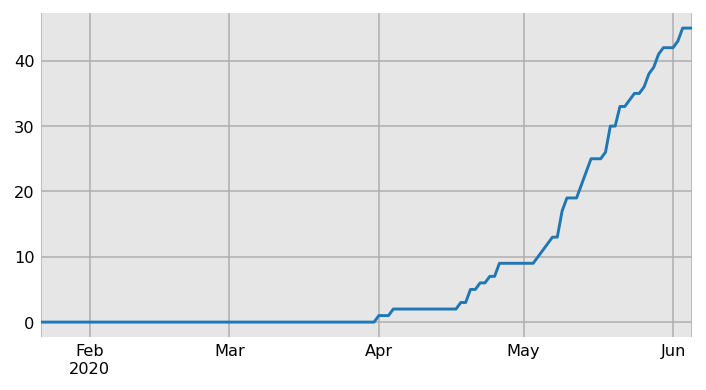

In [83]:
import matplotlib.pyplot as plt
plt.style.use('dashboard.mplstyle')
world_deaths.loc['2020-01-20':'2020-06-05', 'Senegal'].plot();

## Malawi Bad Data

In [93]:
malawi_bad = bad_data['Malawi']
malawi_bad[malawi_bad].head()

2022-11-22    True
2022-11-23    True
2022-11-24    True
2022-11-25    True
2022-11-26    True
Name: Malawi, dtype: bool

In [94]:
world_deaths.loc['2020-11-22':'2020-11-28', 'Malawi']

2020-11-22    185
2020-11-23    185
2020-11-24    185
2020-11-25    185
2020-11-26    185
2020-11-27    185
2020-11-28    185
Name: Malawi, dtype: int64

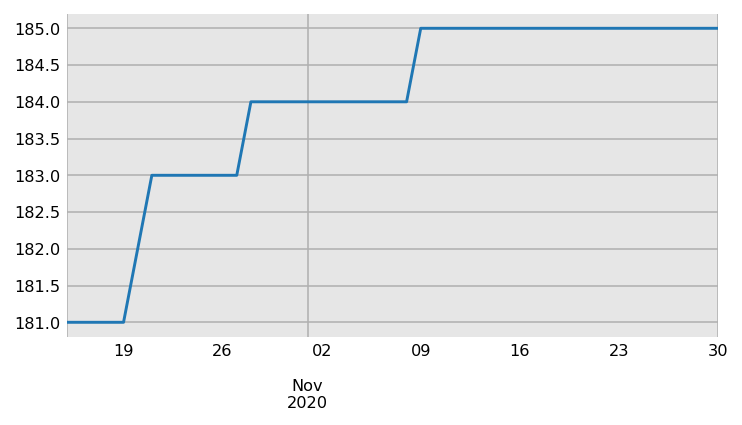

In [98]:
import matplotlib.pyplot as plt
plt.style.use('dashboard.mplstyle')
world_deaths.loc['2020-10-15':'2020-11-30', 'Malawi'].plot();

## Estonia Bad Data


In [100]:
estonia_bad = bad_data['Estonia']
estonia_bad[estonia_bad].head()

2020-08-02    True
2020-08-03    True
2020-08-04    True
2020-08-05    True
2020-08-06    True
Name: Estonia, dtype: bool

In [99]:
world_deaths.loc['2020-08-01':'2020-08-10', 'Estonia']

2020-08-01    69
2020-08-02    63
2020-08-03    63
2020-08-04    63
2020-08-05    63
2020-08-06    63
2020-08-07    63
2020-08-08    63
2020-08-09    63
2020-08-10    63
Name: Estonia, dtype: int64

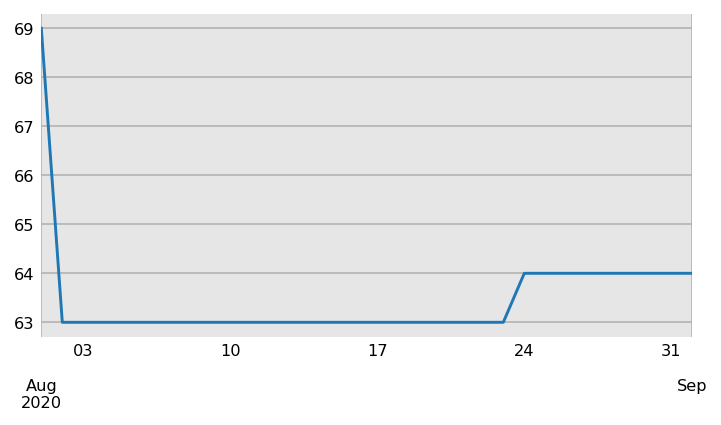

In [62]:
import matplotlib.pyplot as plt
plt.style.use('dashboard.mplstyle')
world_deaths.loc['2020-08-01':'2020-09-01', 'Estonia'].plot();

## Spain Bad Data

In [102]:
spain_bad = bad_data['Spain']
spain_bad[spain_bad].head()

2020-05-25    True
2020-05-26    True
2020-05-27    True
2020-05-28    True
2020-05-29    True
Name: Spain, dtype: bool

Inspect a subset of the data around the first sighting of bad data.

In [104]:
world_deaths.loc['2020-05-21':'2020-05-26', 'Spain']

2020-05-21    27940
2020-05-22    28628
2020-05-23    28678
2020-05-24    28752
2020-05-25    26834
2020-05-26    27117
Name: Spain, dtype: int64

A drop of nearly 2,000 deaths occurred on May 25th. Plotting Spain's total deaths starting from the beginning of May will provide a better plot of what is happening.

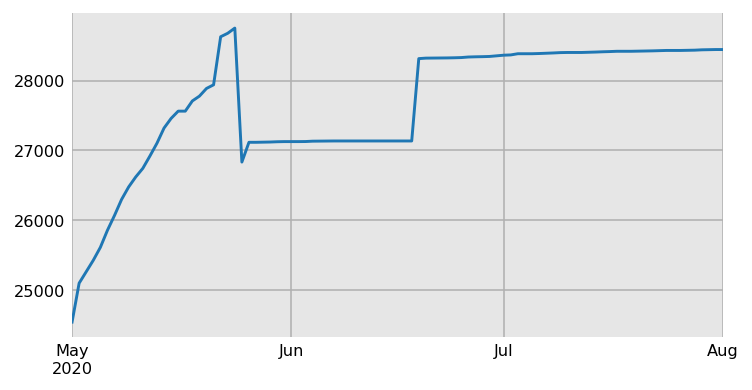

In [108]:
import matplotlib.pyplot as plt
plt.style.use('dashboard.mplstyle')
world_deaths.loc['2020-05-01':'2020-08-01', 'Spain'].plot();

No new deaths were reported after the decline on May 25th, but in the second half of June, there was a significant increase in deaths shortly after there was a period with a low amount of deaths. 

It is necessary to ensure all dates have a value greater than or equal to the previous day. A practical approach is creating a series of booleans with the same length as the original data series that meets some criteria using the mask method.

In [109]:
spain = world_deaths['Spain']
mask = spain < spain.cummax()
mask.tail()

2023-03-05    False
2023-03-06    False
2023-03-07    False
2023-03-08    False
2023-03-09    False
Name: Spain, dtype: bool

Values that don't meet the criteria specified above will replaced with missing values. 

In [110]:
#shows us missing values 
spain_masked = spain.mask(mask)
spain_masked[spain_masked.isna()].head(10)

2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
2020-05-30   NaN
2020-05-31   NaN
2020-06-01   NaN
2020-06-02   NaN
2020-06-03   NaN
Name: Spain, dtype: float64

Using linear interpolation the "fixed" data can be plotted.

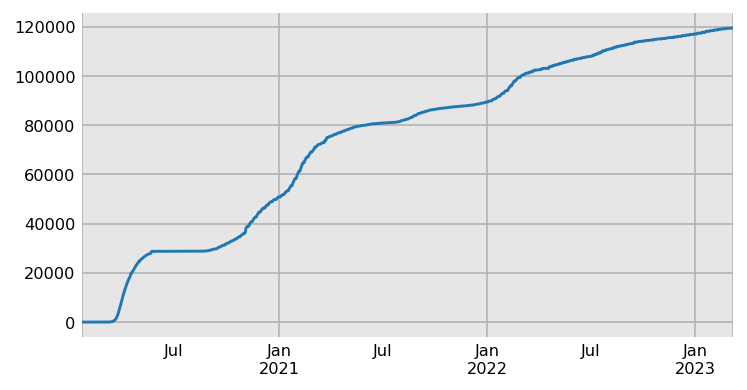

In [112]:
spain_masked.interpolate().plot();

The values are now constantly increasing appropriately. The values are always at least as large as the preceding value. Smoothing the graph will help deal with uneven jumps in the data, making the graphs more straightforward.

### Fixing All Bad Data

The "cummax" method can be applied similar to above. It is also helpful to round totals to whole numbers.

In [113]:
mask = world_deaths < world_deaths.cummax()
world_deaths_fixed = world_deaths.mask(mask).interpolate().round(0).astype('int64')
world_deaths_fixed.tail(3)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2023-03-07,7896,3598,6881,165,1933,0,146,130472,8721,19459,...,1637,14,0,5854,43186,5708,0,2159,4057,5668
2023-03-08,7896,3598,6881,165,1933,0,146,130472,8727,19459,...,1637,14,0,5854,43186,5708,0,2159,4057,5671
2023-03-09,7896,3598,6881,165,1933,0,146,130472,8727,19574,...,1637,14,0,5854,43186,5708,0,2159,4057,5671


In [115]:
mask = world_deaths_fixed < world_deaths_fixed.cummax()
mask.sum().sum()

0

In [116]:
def fix_bad_data(df):
    """
    Corrects any anomalies in the data where daily counts decrease.

    Parameters
    ----------
    df : DataFrame

    Returns
    -------
    DataFrame
    """
    mask = df < df.cummax()
    df = df.mask(mask).interpolate().round(0).astype("int64")
    return df


In [ ]:
#Updating run()function to include the steps above.
def run6():
    """
    Executes a complete data processing and cleaning pipeline.

    Returns
    -------
    dict
        Dictionary of cleaned and processed DataFrames.
    """
    data = {}
    for group in GROUPS:
        for kind in KINDS:
            df = read_local_data(group, kind, "data/raw")
            df = select_columns(df)
            df = update_areas(df)
            df = group_area(df)
            df = transpose_to_ts(df)
            df = fix_bad_data(df)
            data[f"{group}_{kind}"] = df
    return data

In [118]:
from functions import run6
data = run6()
data['world_cases'].head(3)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0


## Data Preparation Complete

In [120]:
from functions import write_data
write_data(data, 'data/prepared', index=True, index_label='date')

## Encapsulate all Steps into a Single Class

Combine all data preparation steps into a single class.


In [125]:
class PrepareData:
    def __init__(self, download_new=True):
        self.download_new = download_new

To check your work run the following code:

In [126]:
from prepare import PrepareData
prepare_data = PrepareData()
data = prepare_data.run()
data['world_deaths'].head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
